In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
# Linear congruential generator: generating uniform numbers between 0 and 1 
def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 123456

In [4]:
intervals

[0, 1.5, 2, 3, 4, 4.5, 6]

In [3]:
# Define the intervals 

# option 1
intervals = list(range(6+1)) # identically distributed

# option 2
intervals = [0,1.5,2,3,4,4.5,6] # some unbalancing

number_of_outcomes = len(intervals)-1 # the spectrum

# the number of dice
number_of_dice = 10

# the number of tosses
N=100000

In [5]:
data = []
results = []
for toss in range(0,N):
    result = np.digitize([lcg()*number_of_outcomes for i in range(number_of_dice)], intervals)
    results.extend(result)
    data.append(np.sum(result))

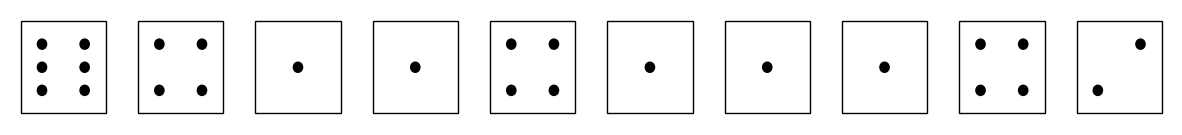

In [9]:
# Create a figure and axis for the grid of subplots
fig, axs = plt.subplots(1, number_of_dice, figsize=(15, 1.5), sharey=True)
faces = {
    1:[(0.5, 0.5)],
    2:[(0.3, 0.3),(0.7, 0.7)],
    3:[(0.3, 0.7),(0.5, 0.5),(0.7, 0.3)],
    4:[(0.3, 0.3),(0.7, 0.3), (0.3, 0.7), (0.7, 0.7)],
    5:[(0.3, 0.3),(0.7, 0.3), (0.3, 0.7), (0.5, 0.5), (0.7, 0.7)],
    6:[(0.3, 0.3),(0.3, 0.5), (0.3, 0.7), (0.7, 0.3), (0.7, 0.5), (0.7, 0.7)]
}

# Iterate over each subplot
for i,ax in enumerate(axs): 
    
    # Set the axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Draw the die face
    die_face = plt.Rectangle((0.1, 0.1), 0.8, 0.8, facecolor='white', edgecolor='black')
    ax.add_patch(die_face)

    # Draw the dots on the die face
    dot_radius = 0.05
    for dot_pos in faces[result[i]]:
        dot = plt.Circle(dot_pos, dot_radius, facecolor='black')
        ax.add_patch(dot)

    # Remove the axis ticks and labels
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)

# Display the die faces
plt.show()


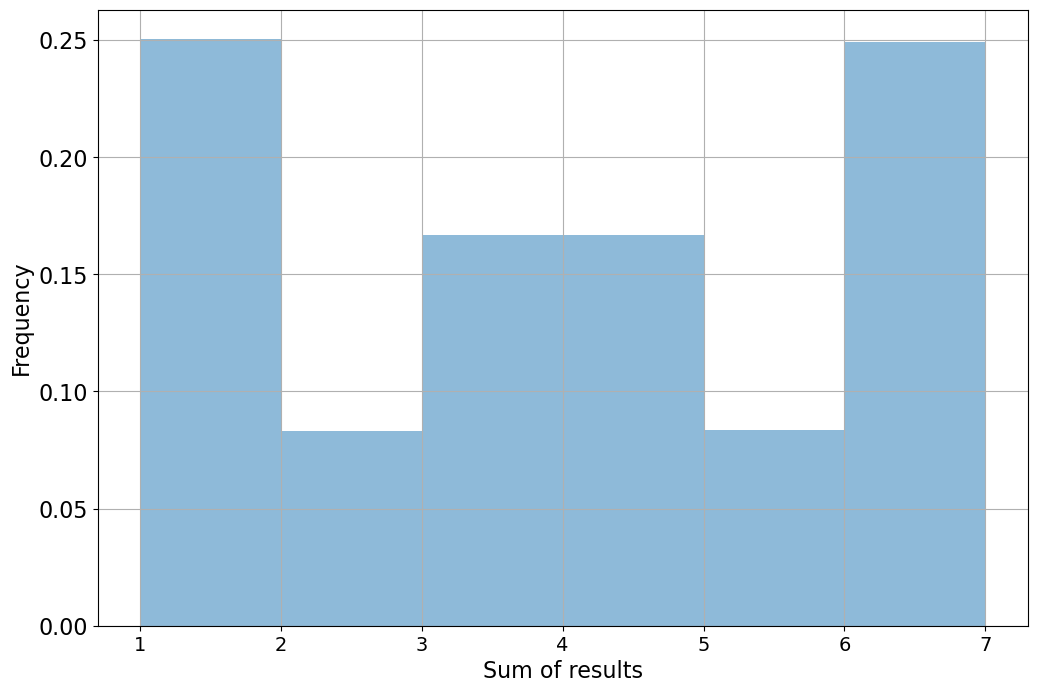

In [10]:
plt.figure(figsize=(12,8))

plt.hist(results, bins=range(1,8), density=True, alpha=0.5, label='simulation')
plt.xlabel('Sum of results', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
#plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')

Compute mean and variance of the distribution

In [11]:
mu = np.mean(results)
sigma = np.std(results)
print (mu, sigma)

3.497818 1.8928532005615224


Expected: Mean=34.97818, Standard Deviation=5.98572739011392Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Computed: Mean=35.460, Standard Deviation=6.074


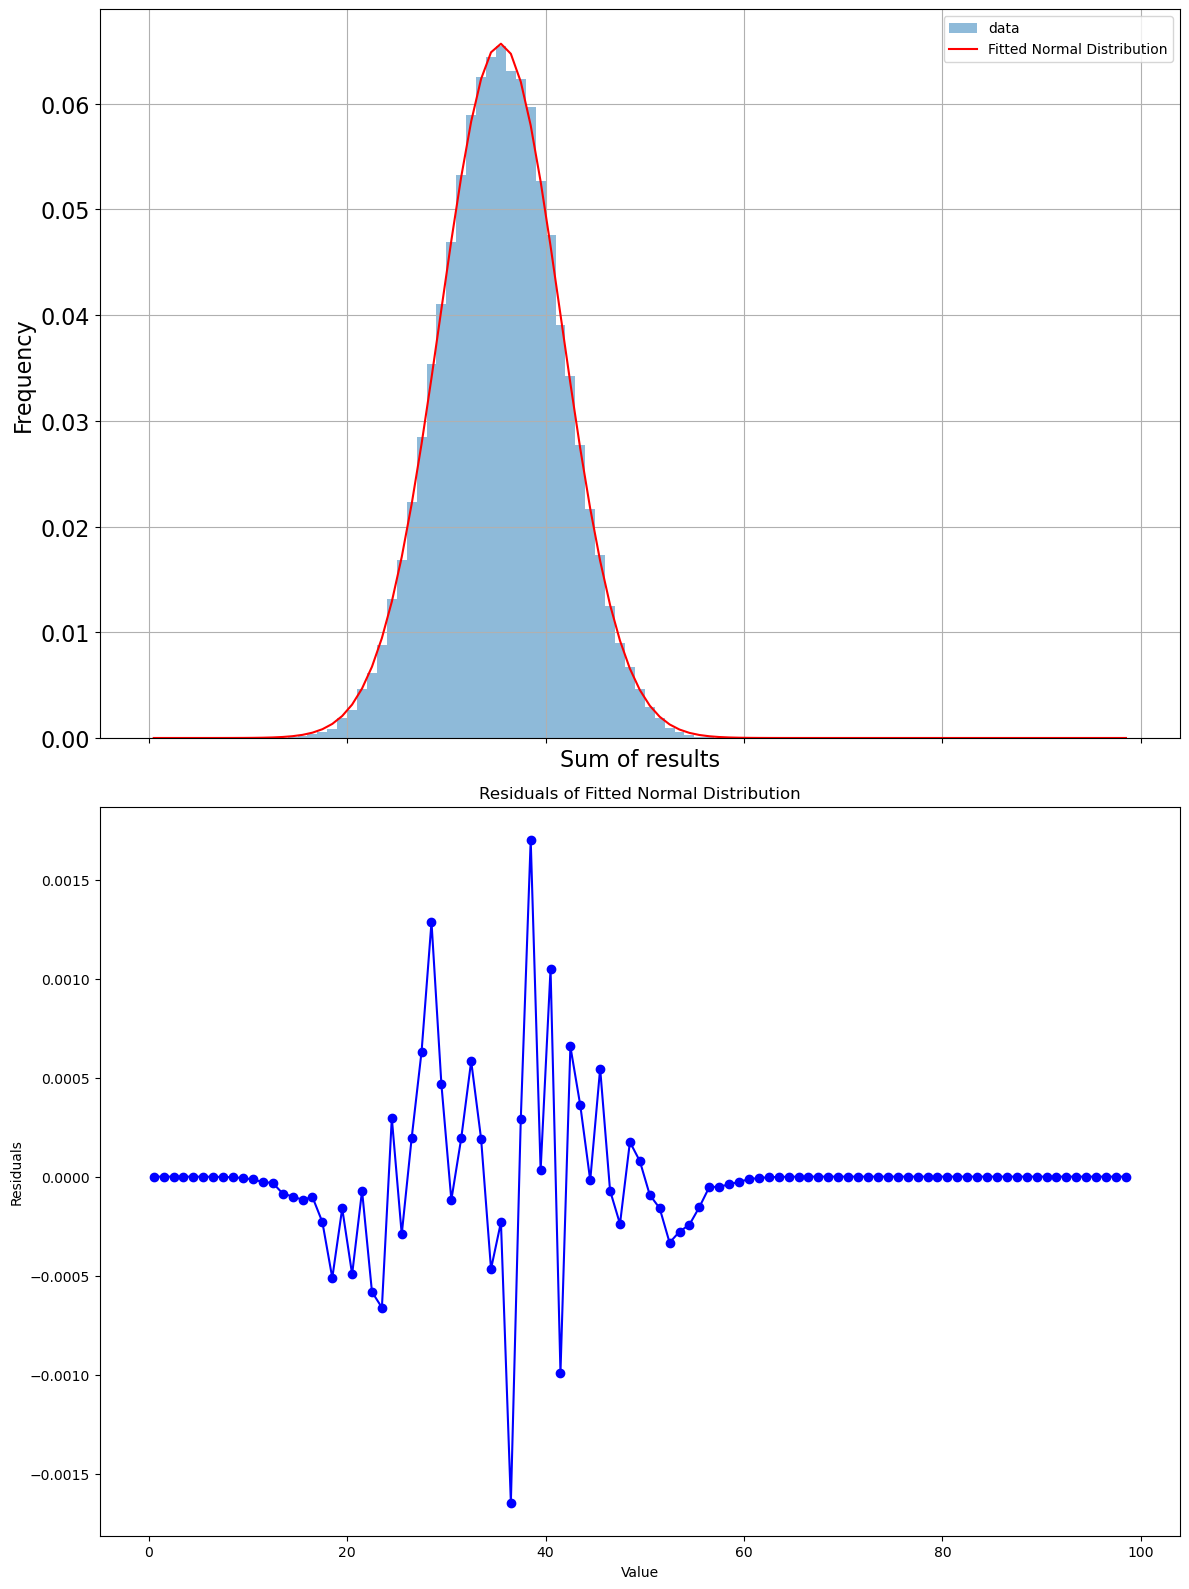

In [12]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), sharex=True)

# Plot the histogram
hist_values, hist_bins, _ = ax1.hist(data, bins=range(0,100), density=True, alpha=0.5, label='data')
ax1.set_xlabel('Sum of results', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(loc=0, fontsize=20)
ax1.grid(axis = 'y')
ax1.grid(axis = 'x')

# the x values
bin_centers = (hist_bins[:-1] + hist_bins[1:]) / 2

# Define the normal distribution function
def normal_distribution(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

# Fit the histogram data to the normal distribution function
params, _ = curve_fit(normal_distribution, bin_centers, hist_values, p0=[np.mean(data), np.std(data)])
print ('Expected: Mean={}, Standard Deviation={}'.format(mu*number_of_dice,sigma*np.sqrt(number_of_dice)))
print ('Computed: Mean={:.3f}, Standard Deviation={:.3f}'.format(params[0],params[1]))



# Compute the fitted curve
fit_curve = normal_distribution(bin_centers, params[0], params[1])

# Compute the residuals
residuals = hist_values - fit_curve

# Plot the fitted curve
ax1.plot(bin_centers, fit_curve, 'r-', label='Fitted Normal Distribution')
ax1.legend()

# Plot the residuals
ax2.plot(bin_centers, residuals, 'bo-')
ax2.set_xlabel('Value')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals of Fitted Normal Distribution')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

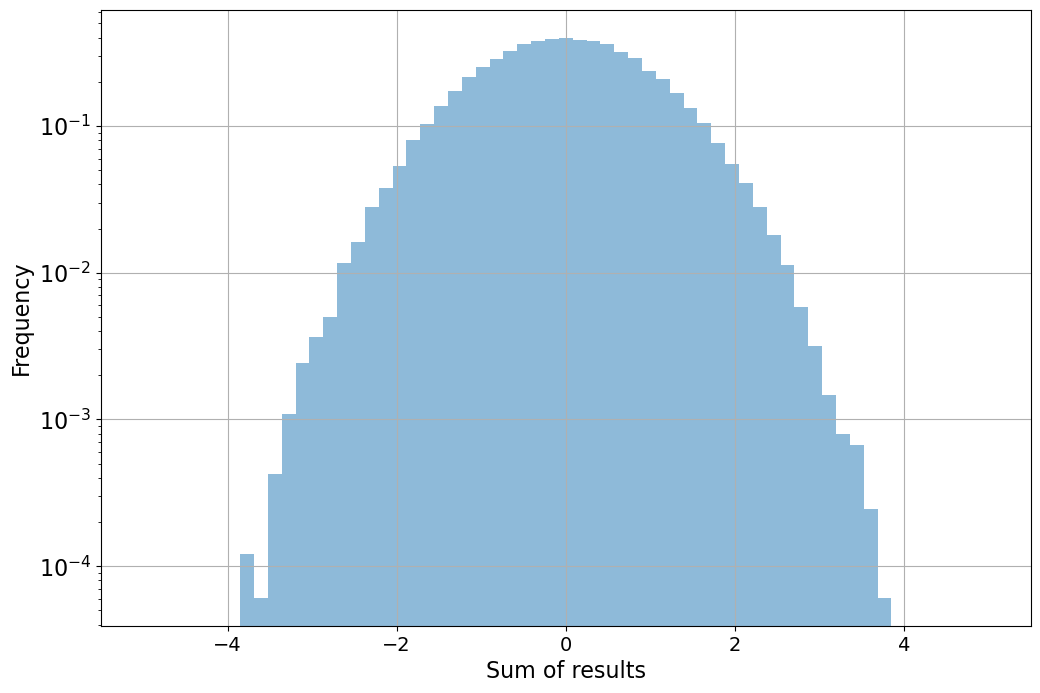

In [13]:
plt.figure(figsize=(12,8))
nbins=6
data_rescaled = (data-mu*number_of_dice)/(sigma*np.sqrt(number_of_dice))
plt.hist(data_rescaled, 
         bins=61, range=[-5,5],
         #bins = [(i-5*nbins)/nbins for i in range(2*5*(nbins)+1)],
         density=True, alpha=0.5, label='simulation',
         log=True)
plt.xlabel('Sum of results', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
#plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')



In [54]:
44/162

0.2716049382716049

In [55]:
5/20

0.25

In [57]:
(44+5)/(162+20)

0.2692307692307692